In [ ]:
# get raw data
import yfinance as yf

asset = "ES=F"
tk = yf.Ticker(asset)
hist = tk.history(period="max", interval="1mo", auto_adjust=False)[
    ["Close"]
]  # [['Open', 'High', 'Low', 'Close', 'Volume']]
hist.columns = [c.lower() for c in hist.columns]
hist["a_return"] = hist["close"].pct_change(12)

print(f"{hist.shape = }")
print(hist.head().to_string())

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# histogram
x_ticks = hist.index
dat = hist["a_return"].dropna()
qtls = dat.quantile([0.25, 0.5, 0.75]).to_list()
icr_1_point_5 = (qtls[2] - qtls[0]) * 1.5
fivnum = [
    dat.min(),
    max(qtls[0] - icr_1_point_5, dat.min()),
    qtls[0],
    qtls[1],
    qtls[2],
    min(qtls[2] + icr_1_point_5, dat.max()),
    dat.max(),
]
bins = np.arange(-0.45, 0.45, 0.1)
counts, _ = np.histogram(dat, bins=bins)
counts = counts / counts.sum()

ax = axs[0]
ax.bar(
    (bins[:-1] + bins[1:]) / 2,
    counts,
    width=np.diff(bins),
    alpha=0.7,
    color="lightblue",
    edgecolor="black",
)
for q in fivnum:
    ax.axvline(q, color="black", linestyle="--", alpha=0.5)
    ax.text(
        q + 0.01, 0.1, f"{q:.2%}", verticalalignment="bottom", color="black", alpha=0.7
    )
ax.set_title(f"{asset} annual return histogram")
ax.grid(True, linestyle="--", alpha=0.5)

# line plot
ax = axs[1]
ax2 = ax.twinx()
ax.plot(x_ticks, hist["close"], label="close")
ax2.plot(x_ticks, hist["a_return"], color="orange", label="annual return")

ax.set_title(f"{asset} close and annual return")
ax2.grid(True, linestyle="--", alpha=0.5)
ax.legend(loc="upper left", fontsize=10, frameon=False)
ax2.legend(loc="upper left", fontsize=10, frameon=False, bbox_to_anchor=(0, 0.9))

plt.tight_layout()

### histgram plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
def histogram_summary(histogram, col_name):

    _ = histogram
    _ = pd.DataFrame({"greater_or_eq": _[1][:-1], "less_than": _[1][1:], "count": _[0]})
    _["Distribution %"] = (_["count"] / _["count"].sum() * 100).round(2)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    x_ticks = [f"[{_.greater_or_eq[i]:.2f}-{_.less_than[i]:.2f})" for i in _.index]

    ax[0].bar(_.index, _["count"])
    ax[0].set_xticks(_.index)
    ax[0].set_xticklabels(x_ticks, rotation=45)
    ax[0].set_xlabel(col_name)
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"Histogram of {col_name}")

    ax[1].bar(_.index, _["Distribution %"])
    ax[1].set_xticks(_.index)
    ax[1].set_xticklabels(x_ticks, rotation=45)
    ax[1].set_xlabel(col_name)
    ax[1].set_ylabel("Distribution %")
    ax[1].set_title(f"Histogram of {col_name} %")

    plt.show()
    return _

In [ ]:
df = pd.read_csv("titanic.csv")
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


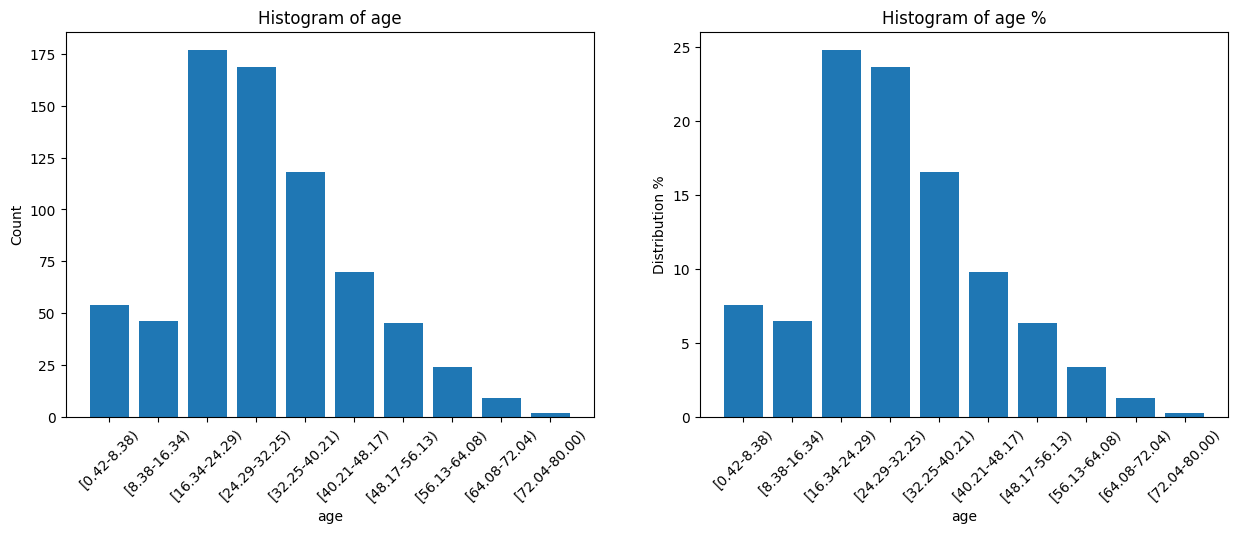

,greater_or_eq,less_than,count,Distribution %
0,0.420,8.378,54,7.56
1,8.378,16.336,46,6.44
2,16.336,24.294,177,24.79
3,24.294,32.252,169,23.67
4,32.252,40.210,118,16.53
5,40.210,48.168,70,9.80
6,48.168,56.126,45,6.30
7,56.126,64.084,24,3.36
8,64.084,72.042,9,1.26
9,72.042,80.000,2,0.28


In [4]:
bins = np.histogram(df["age"].dropna(), bins=10)
histogram_summary(bins, "age")